# Курсовая работа ура


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, normaltest, chisquare, norm
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import sys
# !{sys.executable} -m pip install seaborn
import seaborn as sns
#!{sys.executable} -m pip install -U scikit-learn
from sklearn.linear_model import LinearRegression

### Тут парсим данные и все дела

In [2]:
import pickle
# !{sys.executable} -m pip install xlrd
import xlrd

# Open the Excel file
workbook = xlrd.open_workbook('data.xls')

# Select the active sheet (you can replace 'Sheet1' with the name of your sheet)
sheet = workbook.sheet_by_index(0)

data = {}
name = None
for row in [sheet.row(i) for i in range(1, sheet.nrows)]:
    
    if row[1].value >= 0:
        space = row[0].value.find(' ')
        data[name]['Месяц'].append(row[0].value[0:space])
        data[name]['Год'].append(int(row[0].value[space+1:space+5]))
        data[name]['Кг'].append(int(row[1].value))
        data[name]['Продажи'].append(float(row[2].value))
        data[name]['Количество'].append(int(row[3].value))
    else:
        name = row[0].value
        data[name] = {}
        data[name]['Месяц'] = []
        data[name]['Год'] = []
        data[name]['Кг'] = []
        data[name]['Продажи'] = []
        data[name]['Количество'] = []

with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

### Строим графики, смотрим, анализируем

In [3]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
key = 'Молоко'

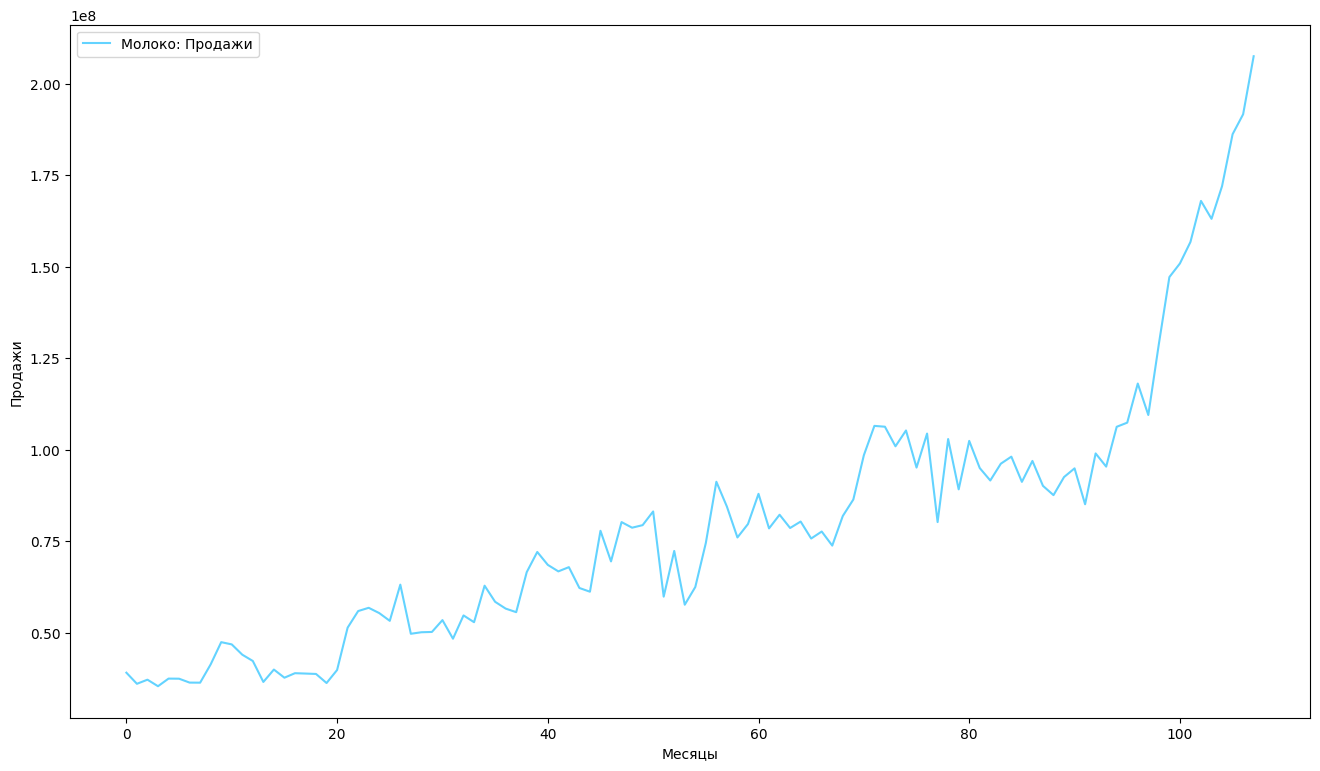

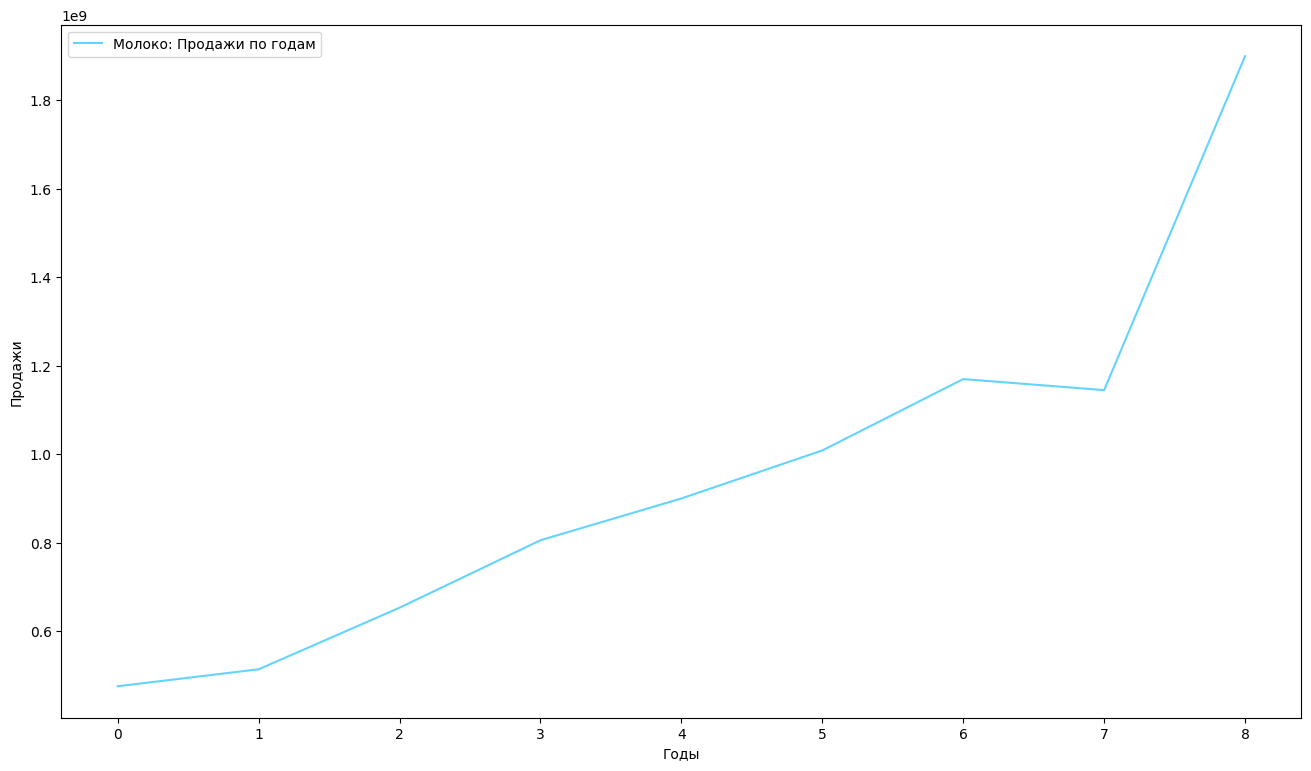

In [5]:
def years_sales(key):
    data[key]['Годы'] = list(set(data[key]['Год']))
    data[key]['ПродажиПоГодам'] = {}
    for i in range(len(data[key]['Продажи'])):
        year = data[key]['Год'][i]
        if data[key]['ПродажиПоГодам'].get(year) is None:
            data[key]['ПродажиПоГодам'][year] = 0
        data[key]['ПродажиПоГодам'][year] += data[key]['Продажи'][i]

def show_years_sales(key):
    plt.figure(figsize=(16, 9))
    sns.lineplot(x=range(len(data[key]['Месяц'])), y=data[key]['Продажи'], color='#63d3ff', label=key + ': Продажи')
    plt.xlabel('Месяцы')
    plt.ylabel('Продажи')
    plt.show()
    plt.figure(figsize=(16, 9))
    # х должен быть range от 0 иначе неправильный график
    sns.lineplot(x=range(len(data[key]['Годы'])), y=data[key]['ПродажиПоГодам'].values(), color='#63d3ff', label=key + ': Продажи по годам')
    plt.xlabel('Годы')
    plt.ylabel('Продажи')
    plt.show()

years_sales(key)
show_years_sales(key)

### Посмотрим продажи молока по годам

<Figure size 1600x900 with 0 Axes>

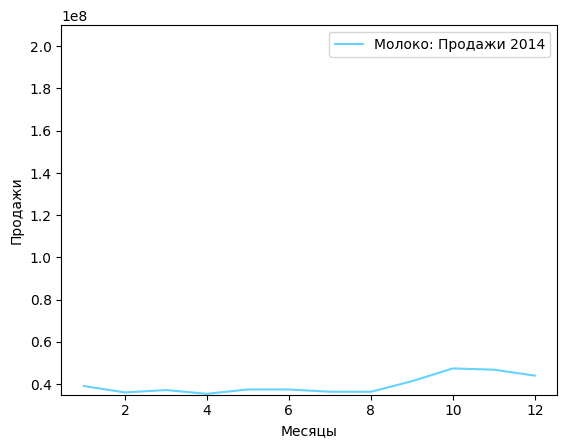

<Figure size 1600x900 with 0 Axes>

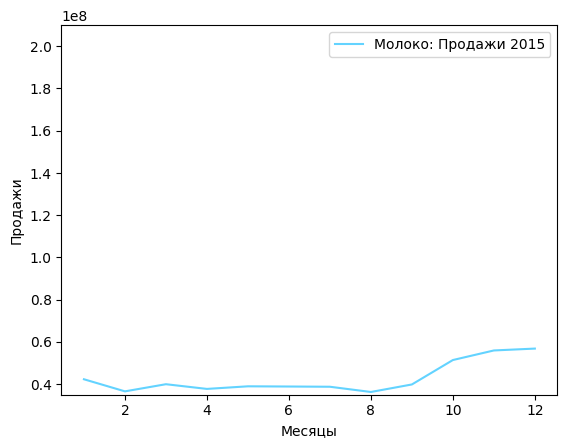

<Figure size 1600x900 with 0 Axes>

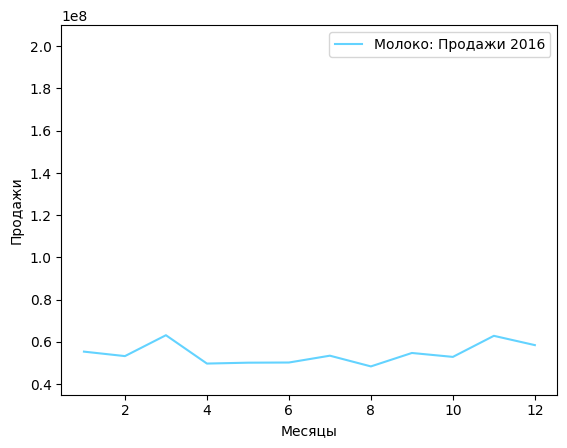

<Figure size 1600x900 with 0 Axes>

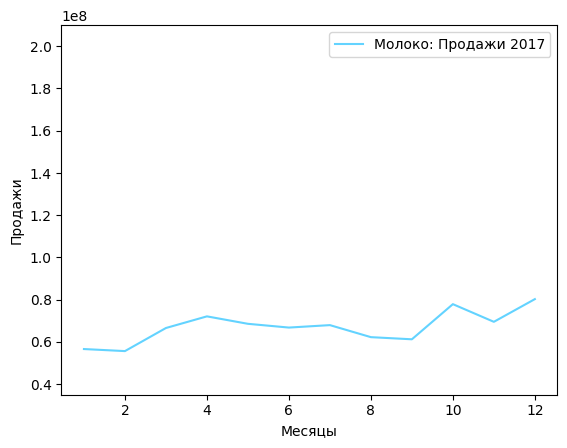

<Figure size 1600x900 with 0 Axes>

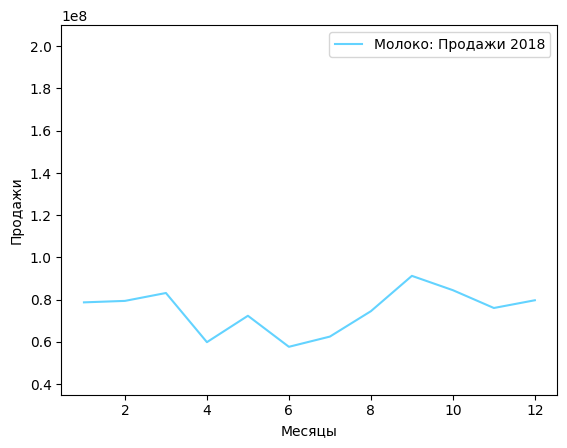

<Figure size 1600x900 with 0 Axes>

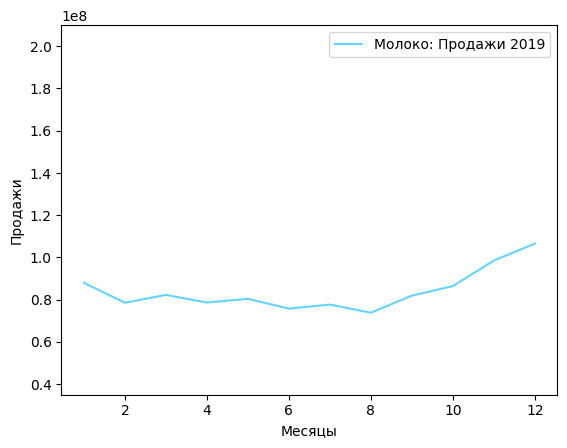

<Figure size 1600x900 with 0 Axes>

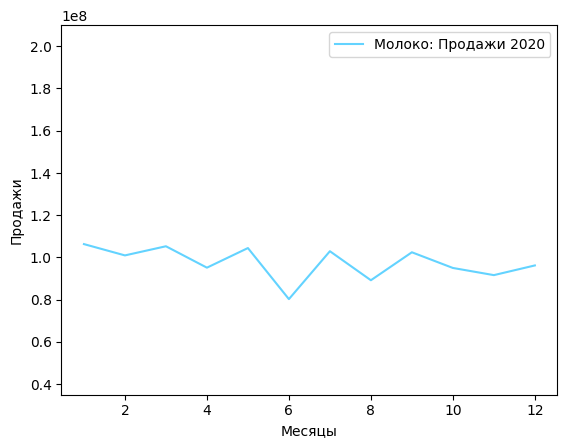

<Figure size 1600x900 with 0 Axes>

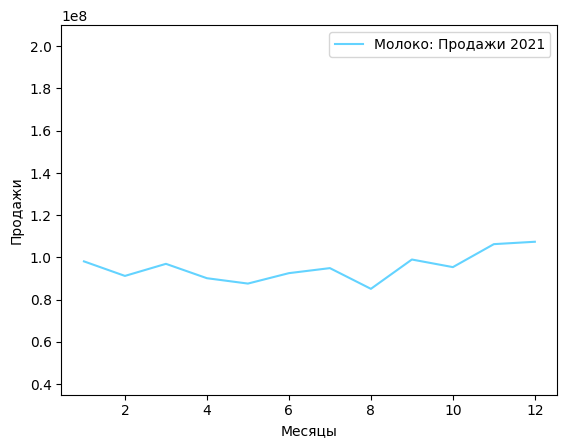

<Figure size 1600x900 with 0 Axes>

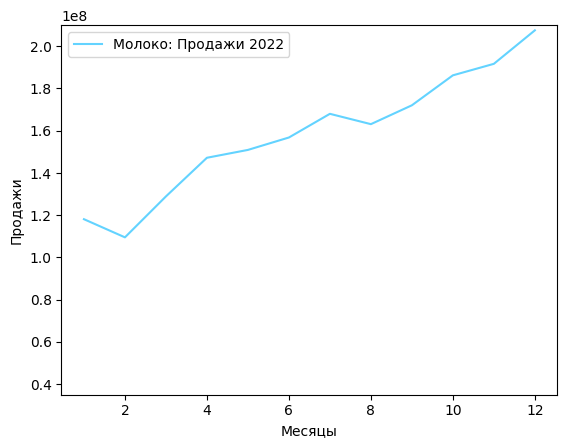

In [6]:
def each_year_monthly(key):
    data[key]['Годы'] = list(set(data[key]['Год']))
    data[key]['ПродажиПоГодам'] = {}
    for i in range(len(data[key]['Продажи'])):
        year = data[key]['Год'][i]
        if data[key]['ПродажиПоГодам'].get(year) is None:
            data[key]['ПродажиПоГодам'][year] = []
        data[key]['ПродажиПоГодам'][year].append(data[key]['Продажи'][i])

def show_each_year_monthly(key):
    for year, sales in data[key]['ПродажиПоГодам'].items():
        plt.figure(figsize=(16, 9))
        fig, ax = plt.subplots()
        sns.lineplot(x=range(1, len(sales) + 1), y=sales, color='#63d3ff', label=key + ': Продажи ' + str(year), ax=ax)
        ax.set_ylim(35000000, 210000000)
        plt.xlabel('Месяцы')
        plt.ylabel('Продажи')
        plt.show()

each_year_monthly(key)
show_each_year_monthly(key)

Замечаем, что в феврале всегда небольшая просадка

В марте во всех годах наблюдается рост

В апреле во всех годах снова просадка, кроме 2017 года

Май неоднозначен, в половине годов - просадка, в половине - рост

В июне - просадка, в июле она еще более ярко выражена

К концу года же наблюдается рост относительно основного тренда, не всегда большой


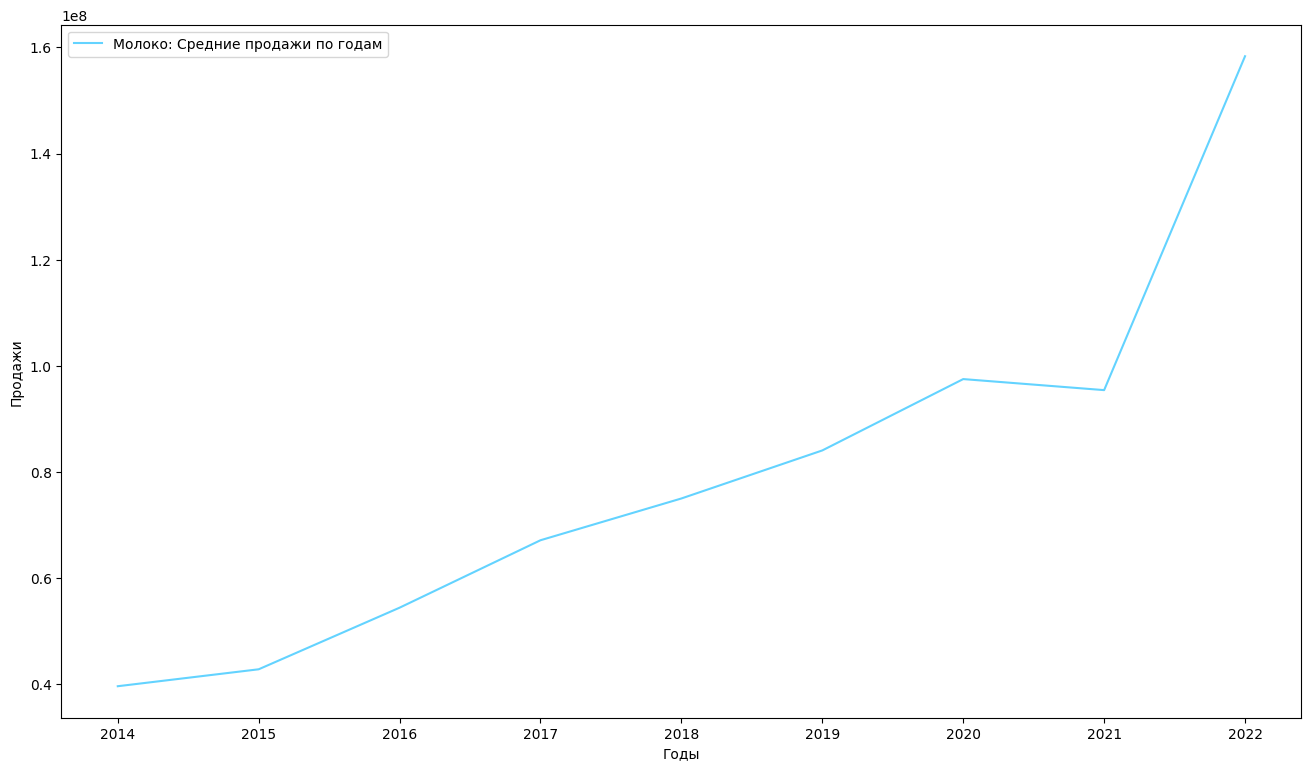

In [7]:
def years_mean(key):
    data[key]['СреднееПоГодам'] = {}
    for year in range(2014, 2023):
        data[key]['СреднееПоГодам'][year] = np.mean(data[key]['ПродажиПоГодам'][year])

def show_years_mean(key):
    plt.figure(figsize=(16, 9))
    sns.lineplot(x=data[key]['СреднееПоГодам'].keys(), y=data[key]['СреднееПоГодам'].values(), color='#63d3ff', label=key + ': Средние продажи по годам')
    plt.xlabel('Годы')
    plt.ylabel('Продажи')
    plt.show()

years_mean(key)
show_years_mean(key)

In [9]:
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
months_short = list(map(lambda x: x[:3], months))

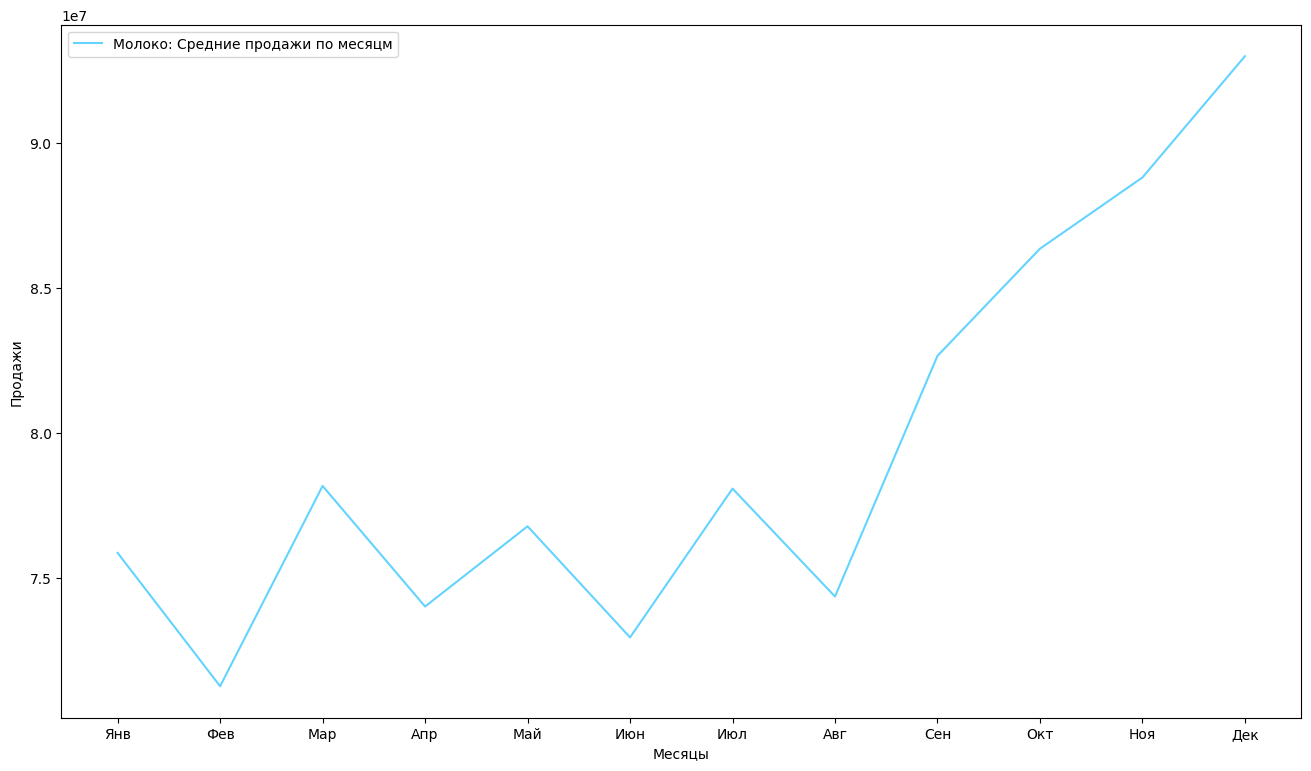

In [10]:
def months_mean(key):
    data[key]['ПродажиПоМесяцам'] = {}
    data[key]['СреднееПоМесяцам'] = {}
    for month in months:
        data[key]['ПродажиПоМесяцам'][month] = []

    for i in range(len(data[key]['Продажи'])):
        data[key]['ПродажиПоМесяцам'][data[key]['Месяц'][i]].append(data[key]['Продажи'][i])

    for month, arr in data[key]['ПродажиПоМесяцам'].items():
        data[key]['СреднееПоМесяцам'][month] = np.mean(arr)

def show_months_mean(key):
    plt.figure(figsize=(16, 9))
    sns.lineplot(x=months_short, y=data[key]['СреднееПоМесяцам'].values(), color='#63d3ff', label=key + ': Средние продажи по месяцм')
    plt.xlabel('Месяцы')
    plt.ylabel('Продажи')
    plt.show()

months_mean(key)
show_months_mean(key)

### Тут посчитаем индексы сезонности

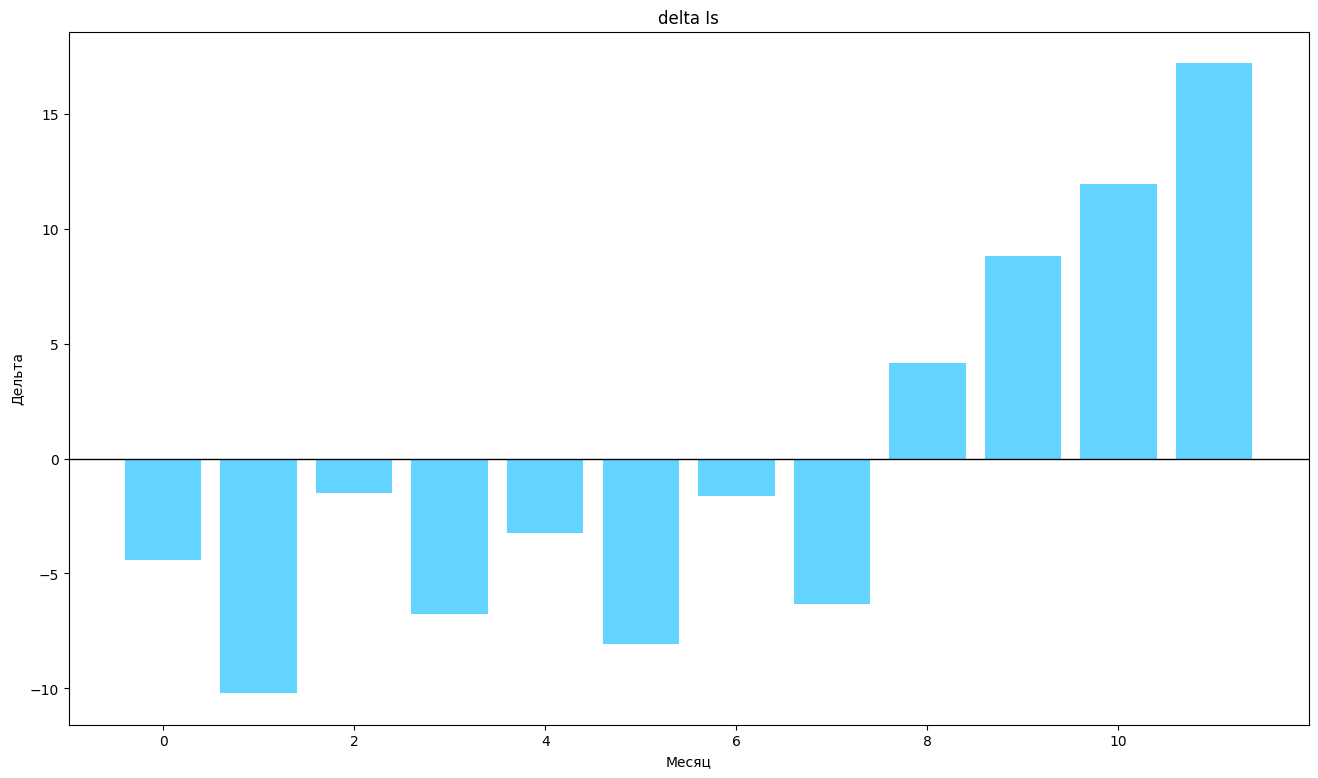

In [66]:
years_mean_mean = np.mean(list(data[key]['СреднееПоГодам'].values()))

def season_index(key):
    data[key]['ИндексСезонности'] = {}
    data[key]['ИндексСезонностиПрирост'] = {}
    for month in months:
        data[key]['ИндексСезонности'][month] = data[key]['СреднееПоМесяцам'][month] * 100 / years_mean_mean 
        data[key]['ИндексСезонностиПрирост'][month] = data[key]['ИндексСезонности'][month] - 100

def show_season_index(key):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.bar(np.arange(len(months)), np.maximum(list(data[key]['ИндексСезонностиПрирост'].values()), 0), color='#63d3ff')
    ax.bar(np.arange(len(months)), np.minimum(list(data[key]['ИндексСезонностиПрирост'].values()), 0), color='#63d3ff')
    ax.axhline(0, color='black', linewidth=1)
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Дельта')
    plt.title('delta Is')
    plt.show()

season_index(key)
show_season_index(key)

#### Сгладим исходный ряд методом скользящей средней

<Figure size 1600x900 with 0 Axes>

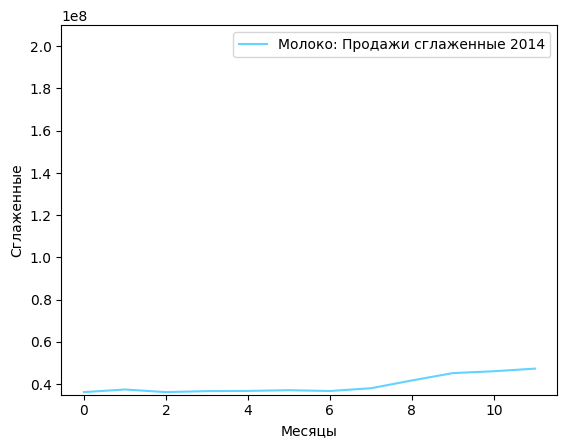

<Figure size 1600x900 with 0 Axes>

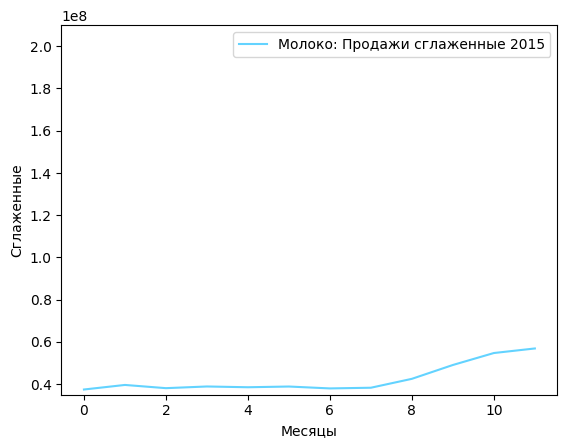

<Figure size 1600x900 with 0 Axes>

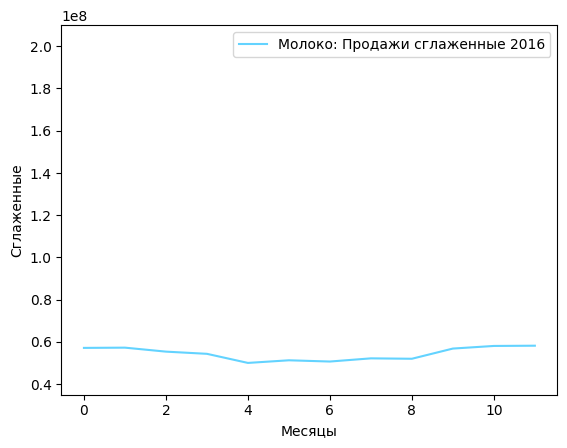

<Figure size 1600x900 with 0 Axes>

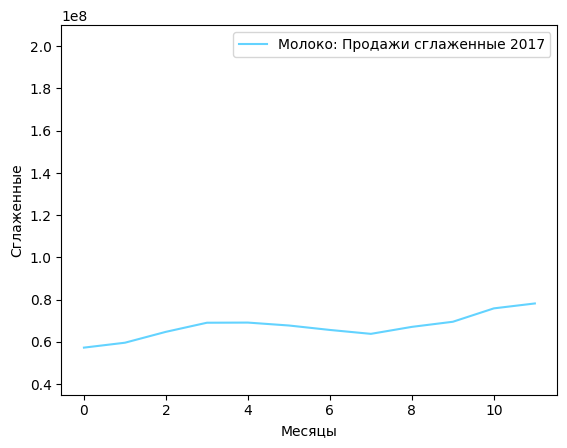

<Figure size 1600x900 with 0 Axes>

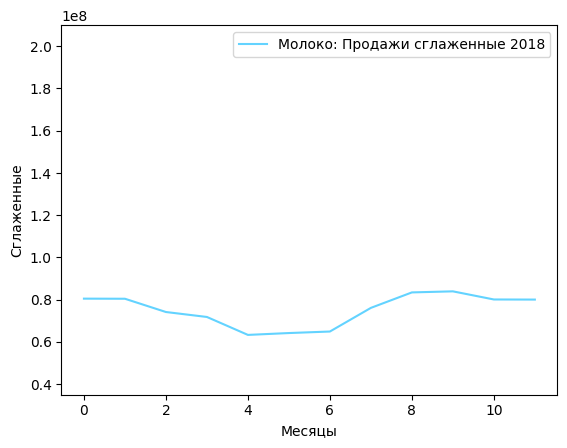

<Figure size 1600x900 with 0 Axes>

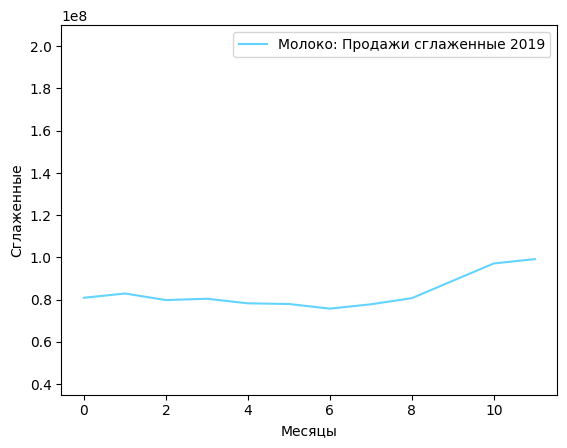

<Figure size 1600x900 with 0 Axes>

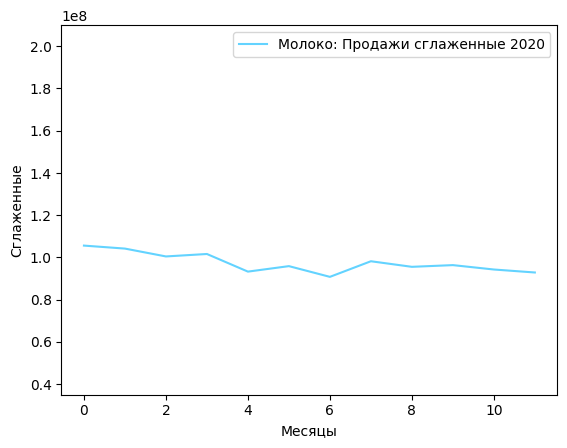

<Figure size 1600x900 with 0 Axes>

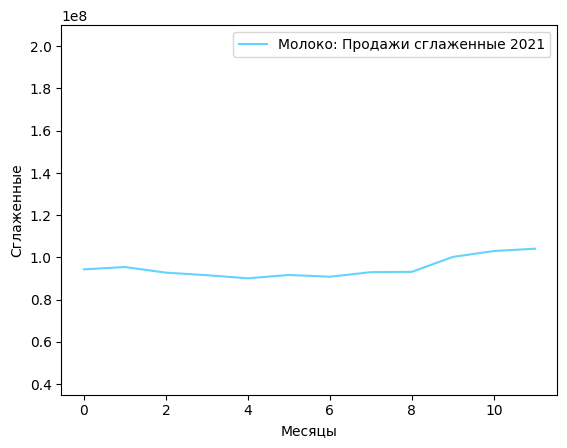

<Figure size 1600x900 with 0 Axes>

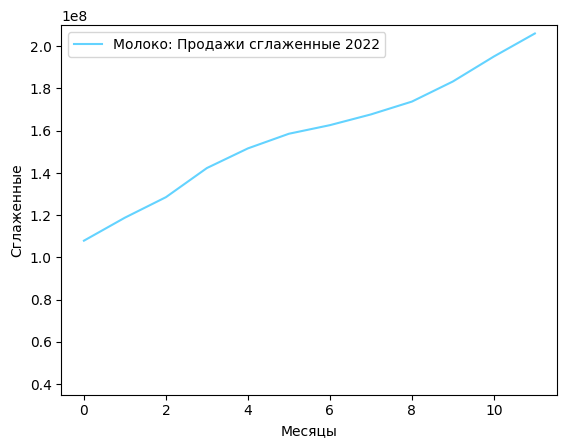

In [12]:
# h - годы
# n - месяцы
# m - хз
# i - месяц, j - год
m = 3

def sliding_mean(key):
    data[key]['СглаженноеПоГодам'] = {}
    for year in data[key]['Годы']:
        data[key]['СглаженноеПоГодам'][year] = []

    for year in data[key]['Годы']: #h
        slide = 0
        for i in range(m):
            slide += data[key]['ПродажиПоГодам'][year][i] / m
        for i in range(m, len(months)):
            data[key]['СглаженноеПоГодам'][year].append(slide)
            slide += data[key]['ПродажиПоГодам'][year][i] / m
            slide -= data[key]['ПродажиПоГодам'][year][i-m] / m
        data[key]['СглаженноеПоГодам'][year].append(slide)
        yk, yl, l = data[key]['СглаженноеПоГодам'][year][-1], data[key]['СглаженноеПоГодам'][year][0], len(data[key]['СглаженноеПоГодам'][year]) - 3
        tail = (yk - yl) / l
        data[key]['СглаженноеПоГодам'][year].append(yk + tail)
        data[key]['СглаженноеПоГодам'][year].insert(0, yl - tail)

def show_sliding_mean(key):
    for year, slide in sorted(data[key]['СглаженноеПоГодам'].items(), key=lambda x: x[0]):
        plt.figure(figsize=(16, 9))
        fig, ax = plt.subplots()
        ax.set_ylim(35000000, 210000000)
        sns.lineplot(x=range(len(slide)), y=slide, color='#63d3ff', label=key + ': Продажи сглаженные ' + str(year), ax=ax)
        plt.xlabel('Месяцы')
        plt.ylabel('Сглаженные')
        plt.show()


sliding_mean(key)
show_sliding_mean(key)

### Определяем сезонную компоненту

In [41]:
def season_component(key):
    data[key]['СезоннаяКомпонента'] = {}
    for year in data[key]['Годы']:
        data[key]['СезоннаяКомпонента'][year] = []

    for year in data[key]['Годы']:
        for i in range(len(data[key]['СглаженноеПоГодам'][year])):
            season = data[key]['ПродажиПоГодам'][year][i] - data[key]['СглаженноеПоГодам'][year][i]
            data[key]['СезоннаяКомпонента'][year].append(season)
    
    data[key]['СредняяСезонная'] = []
    for i in range(len(months)):
        season = 0
        for year in data[key]['Годы']:
            season += data[key]['СезоннаяКомпонента'][year][i]
        season /= len(data[key]['Годы'])
        data[key]['СредняяСезонная'].append(season)
    
    c = sum(data[key]['СредняяСезонная']) / len(months)
    for i in range(len(months)):
        data[key]['СредняяСезонная'][i] -= c

season_component(key)

### Устраняем сезонную компоненту

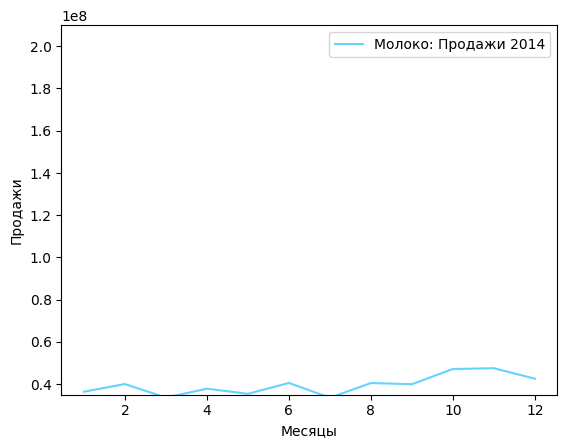

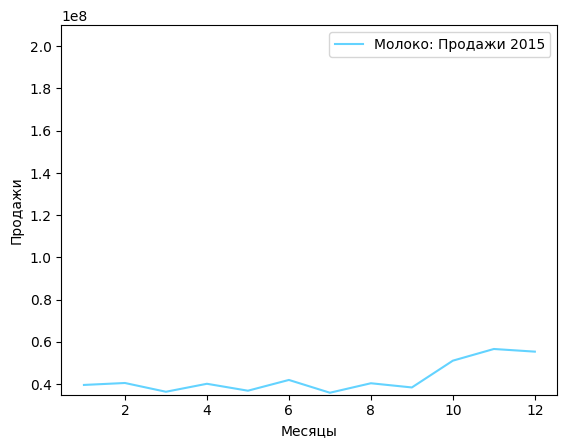

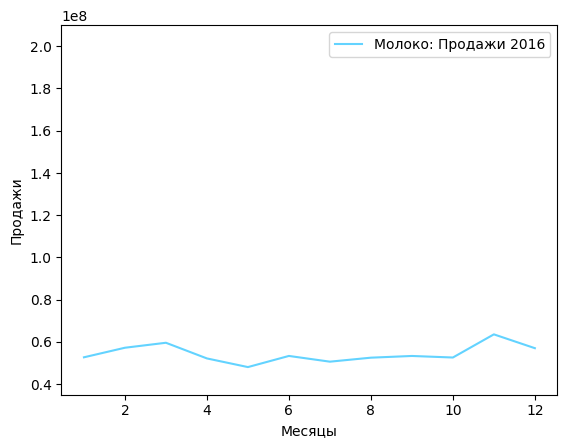

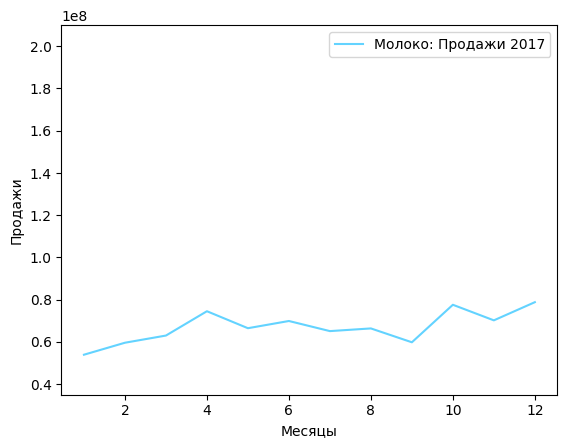

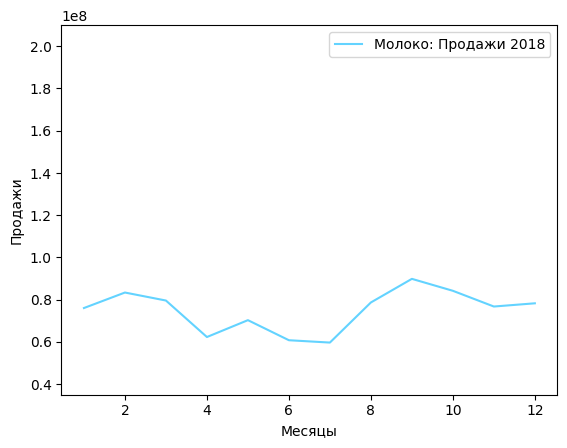

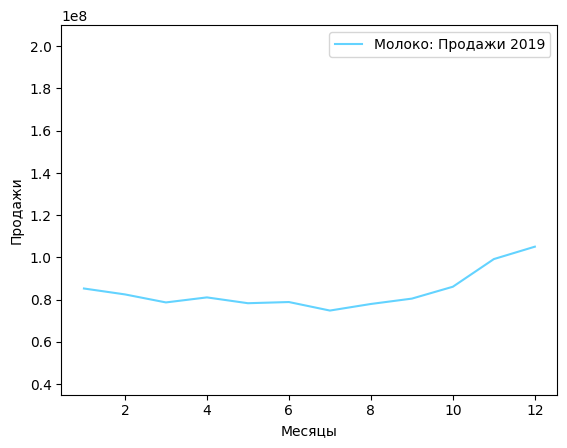

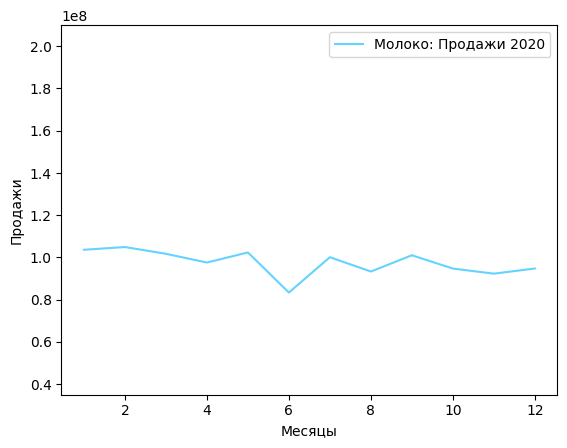

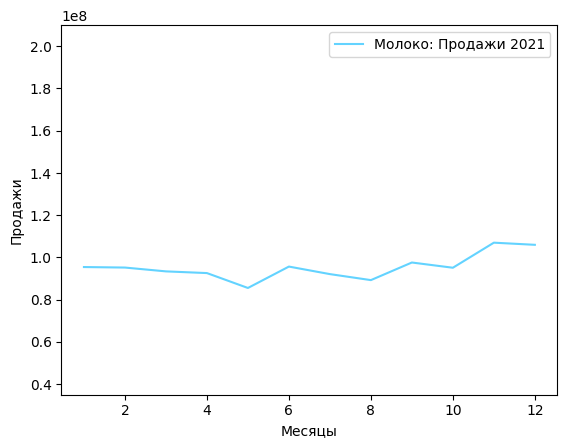

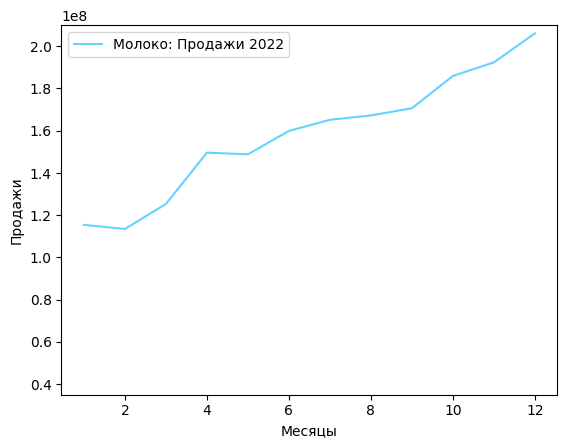

In [65]:
def erase_season_component(key):
    data[key]['ПродажиБезСезоннойКомпоненты'] = {}
    for year in data[key]['Годы']:
        data[key]['ПродажиБезСезоннойКомпоненты'][year] = []

    for year in data[key]['Годы']:
        for i in range(len(months)):
            data[key]['ПродажиБезСезоннойКомпоненты'][year].append(data[key]['ПродажиПоГодам'][year][i] - data[key]['СредняяСезонная'][i])

def show_erased_season_component(key):
    for year, sales in sorted(data[key]['ПродажиБезСезоннойКомпоненты'].items(), key=lambda x: x[0]):
        fig, ax = plt.subplots()
        sns.lineplot(x=range(1, len(sales) + 1), y=sales, color='#63d3ff', label=key + ': Продажи ' + str(year), ax=ax)
        ax.set_ylim(35000000, 210000000)
        plt.xlabel('Месяцы')
        plt.ylabel('Продажи')
        plt.show()

erase_season_component(key)
show_erased_season_component(key)

### Определяем тренд, делаем модели

In [43]:
def linear_models(key):
    data[key]['Модель'] = {}
    for year in data[key]['Годы']:
        model = LinearRegression()
        model.fit(np.array(range(len(months))).reshape(-1, 1), data[key]['ПродажиБезСезоннойКомпоненты'][year])
        data[key]['Модель'][year] = model

linear_models(key)

### Перерасчет значений

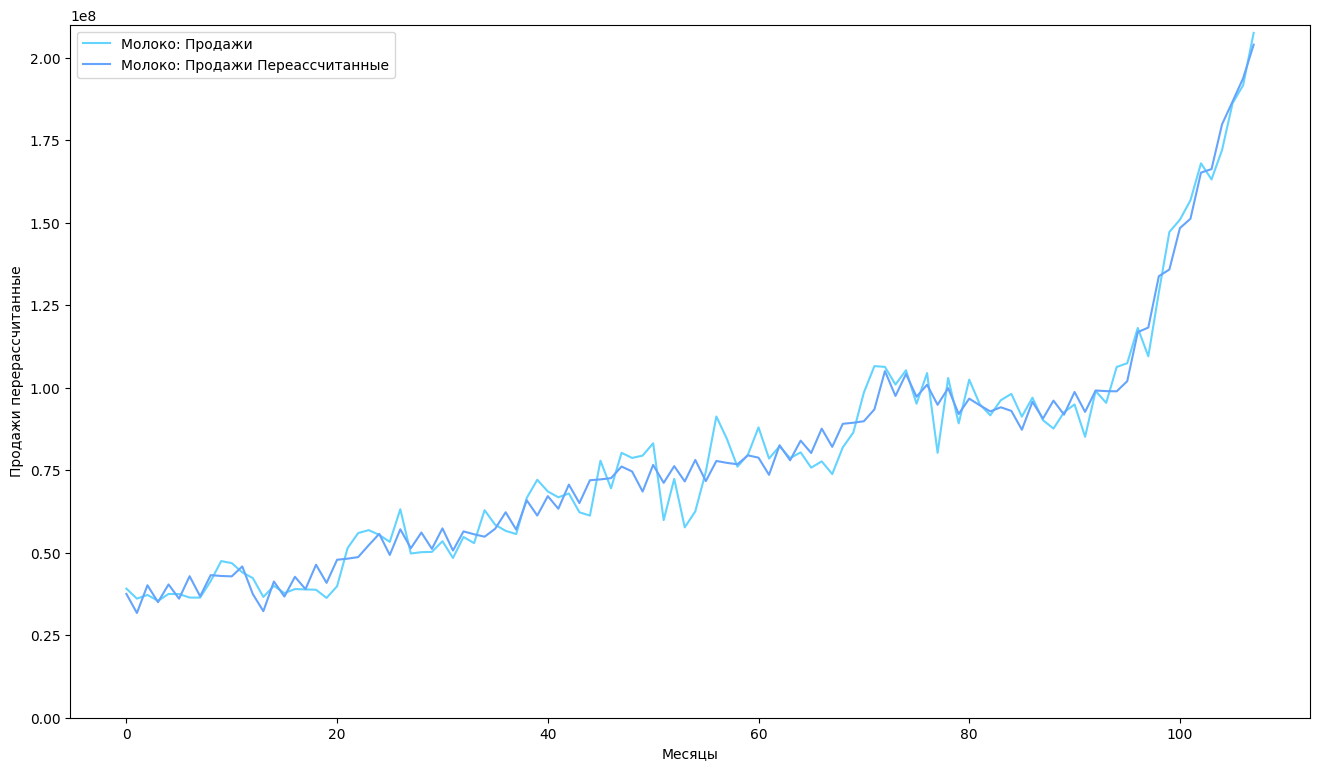

In [60]:
def recalc_sales(key):
    data[key]['ПерерассчитанныеПродажи'] = {}

    for year in data[key]['Годы']:
        x = np.array(range(len(months))).reshape(-1, 1)
        y = np.array(data[key]['Модель'][year].predict(x))
        y += data[key]['СредняяСезонная']
        data[key]['ПерерассчитанныеПродажи'][year] = list(y)

def show_recalculated_sales(key):
    sales = np.array([x[1] for x in sorted(data[key]['ПродажиПоГодам'].items(), key=lambda x:x[0])]).flatten() 
    sales_recalculated = np.array([x[1] for x in sorted(data[key]['ПерерассчитанныеПродажи'].items(), key=lambda x:x[0])]).flatten()
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.set_ylim(0, 210000000)

    sns.lineplot(x=range(len(sales)), y=sales, color='#63d3ff', label=key + ': Продажи', ax=ax)
    sns.lineplot(x=range(len(sales_recalculated)), y=sales_recalculated, color='#65a4fc', label=key + ': Продажи Переассчитанные', ax=ax)
    plt.xlabel('Месяцы')
    plt.ylabel('Продажи перерассчитанные')
    plt.show()

recalc_sales(key)
show_recalculated_sales(key)

### Оценим качество модели

In [67]:
Y = np.array([x[1] for x in sorted(data[key]['ПродажиПоГодам'].items(), key=lambda x:x[0])]).flatten()
Y_mean = np.mean(Y)
delta = Y - Y_mean
Y_recalculated = np.array([x[1] for x in sorted(data[key]['ПерерассчитанныеПродажи'].items(), key=lambda x:x[0])]).flatten()
E = Y - Y_recalculated
R_sqared = 1 - np.dot(E, E.T) / np.dot(delta, delta.T)

R_sqared

0.9751117123932801